In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)


In [35]:
# loading data
df= pd.read_csv('Dataset\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [36]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [37]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [38]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [39]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [40]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})

df['class'] = pd.to_numeric(df['class'], errors='coerce')
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



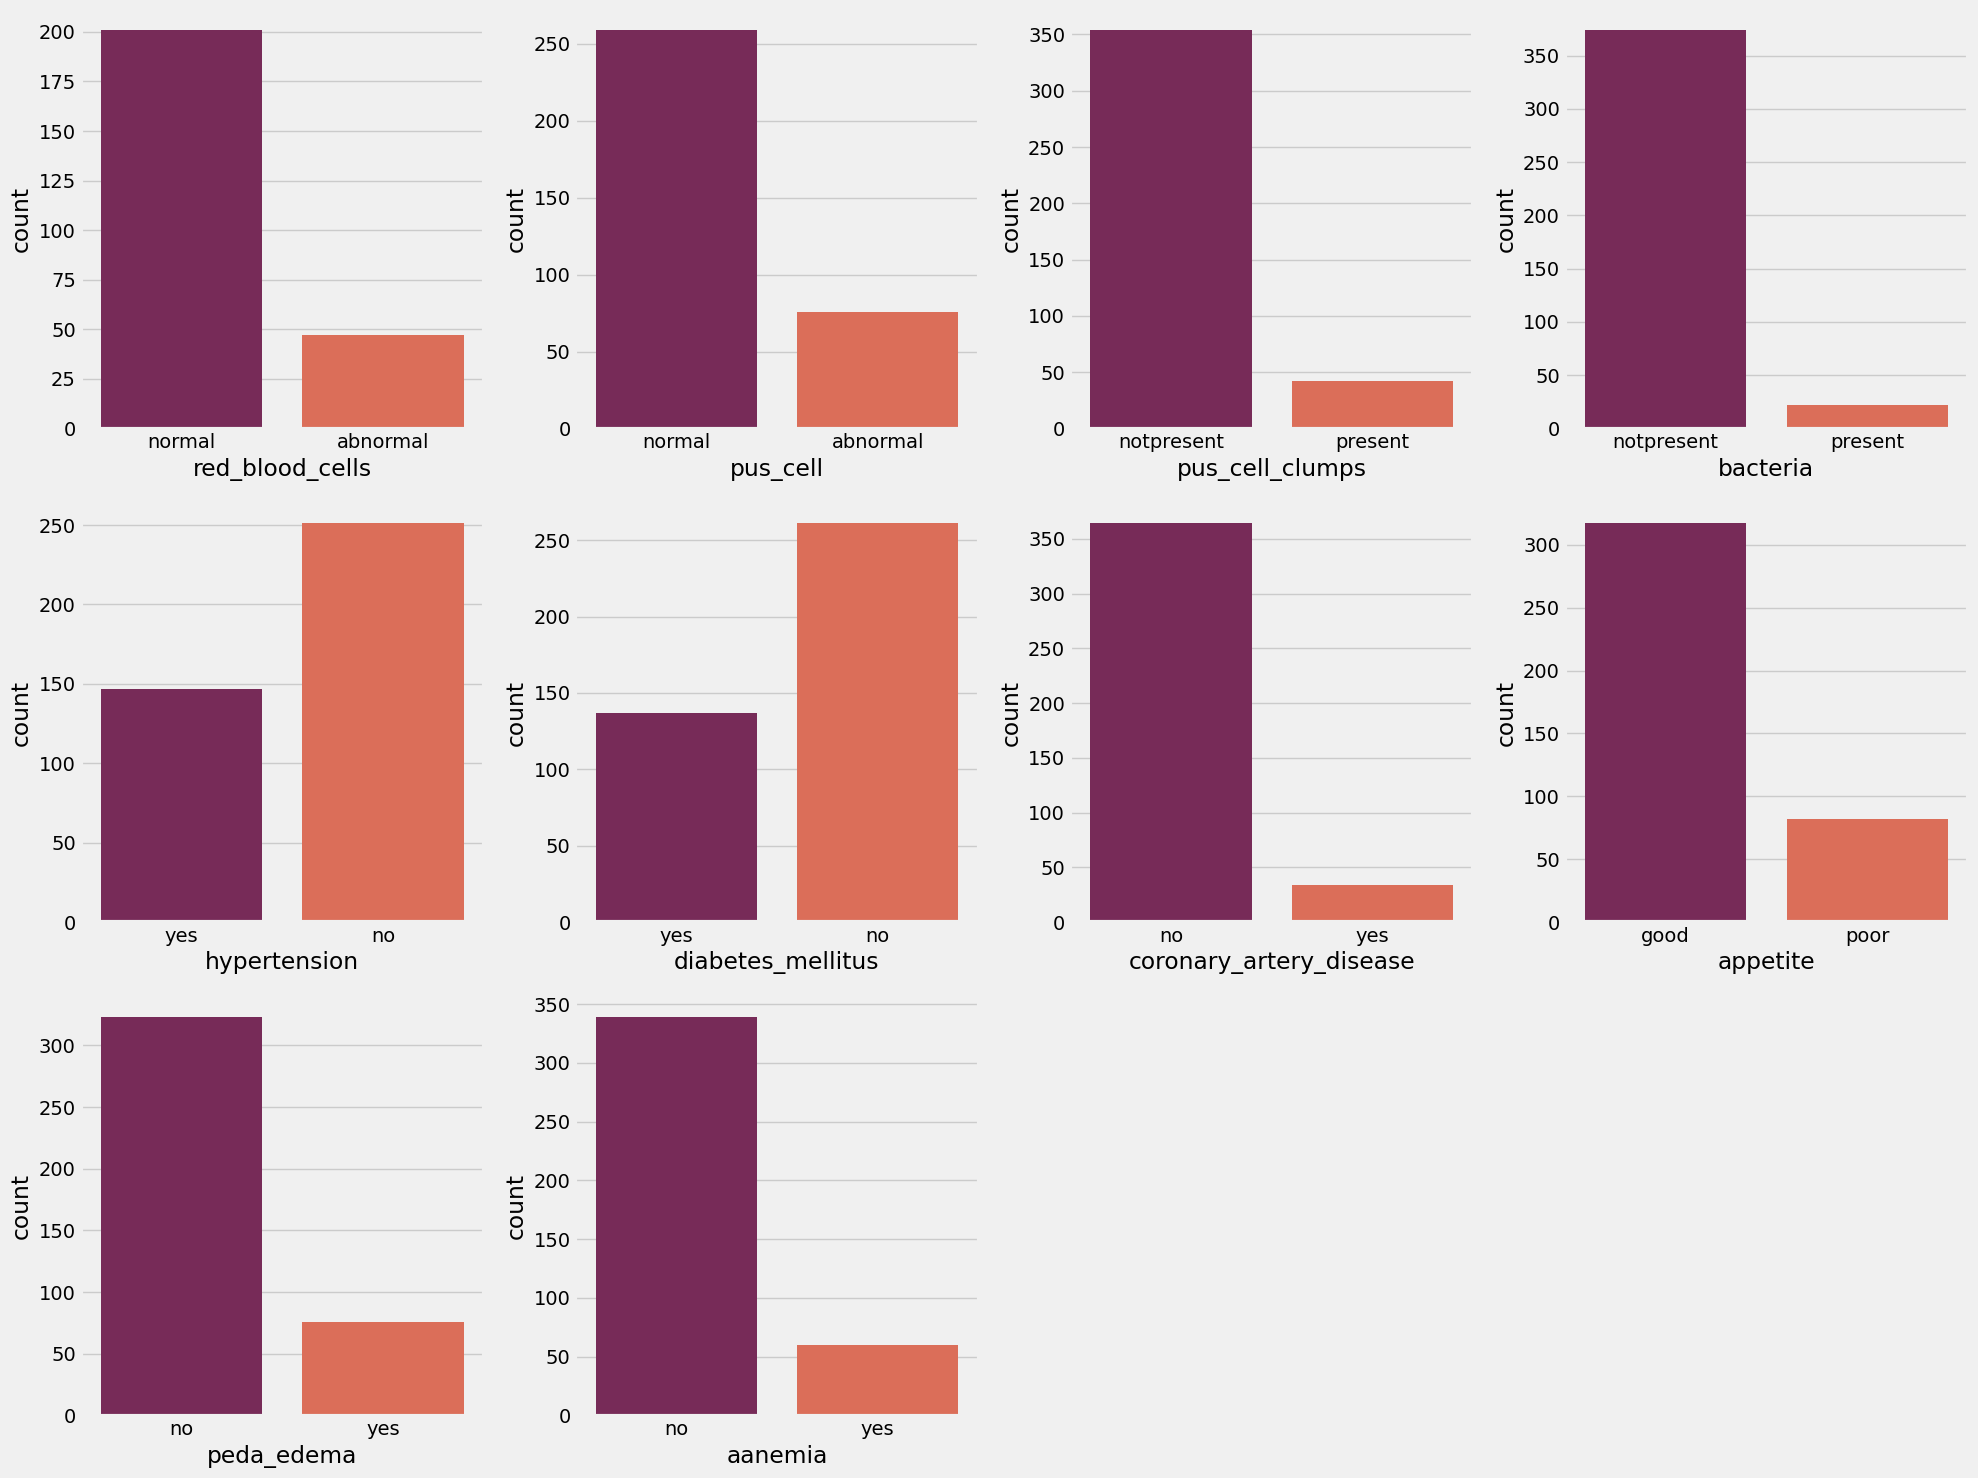

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns  # Adjust based on your DataFrame

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:  # You can increase this number if you have more columns
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column], palette='rocket', ax=ax)  # Corrected 'x' parameter
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

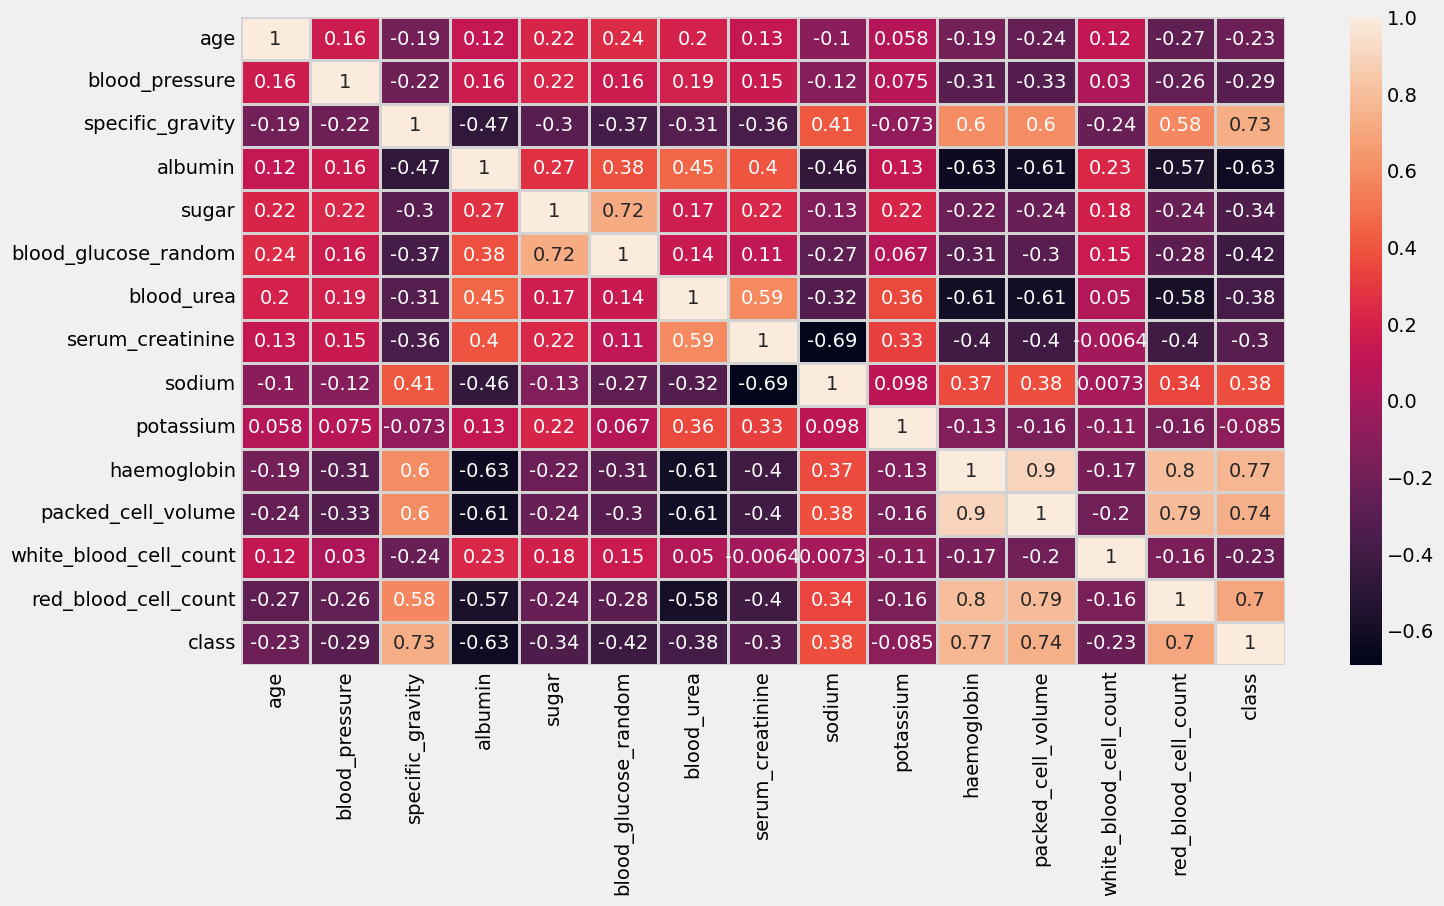

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are used for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()


In [43]:
#Data Preprocessing
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [44]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [45]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [46]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [47]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [48]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [49]:
#As all of the categorical columns have 2 categories we can use label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Transform categorical columns using LabelEncoder
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Store the  rows into a new DataFrame
df_first = df.head(400)

# Define the file path where you want to save the new CSV file
output_file = "Preprocessed.csv"

# Save the rows into a new CSV file
df_first.to_csv(output_file, index=False)


In [51]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Load the dataset into a DataFrame
df = pd.read_csv('Preprocessed.csv')

# Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Experiment with different values of K
best_accuracy = 0
best_k = None
best_cluster_labels = None

for k in range(2, 11):  # Try K values from 2 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    
    # Calculate accuracy (if actual labels are available)
    actual_labels = df['class']  # Assuming 'class' is the target column
    if actual_labels is not None:
        accuracy = accuracy_score(actual_labels, cluster_labels)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_cluster_labels = cluster_labels

# Use the best K value to calculate accuracy
if best_cluster_labels is not None:
    print(f"Best K: {best_k}")
    print(f"Best Accuracy: {best_accuracy}")
else:
    print("Actual labels not available. Unable to calculate accuracy.")


Best K: 2
Best Accuracy: 0.88


In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
import pandas as pd
# Load the dataset into a DataFrame
df = pd.read_csv('Preprocessed.csv')

# Assuming df contains your dataset with input features only
# If not, you may need to prepare your dataset accordingly

# Initialize Isolation Forest
iforest = IsolationForest(random_state=42)

# Fit Isolation Forest to the dataset
iforest.fit(df)

# Predict outliers/anomalies (-1 for outliers, 1 for inliers)
outlier_preds = iforest.predict(df)

# If you have actual labels (targets) available, you can calculate the accuracy
# For example, if 'class' column contains actual labels
actual_labels = df['class']  # Assuming 'class' is the target column

# Convert actual labels to binary (1 for inliers, 0 for outliers)
actual_labels_binary = actual_labels.replace({0: 1, 1: 0})  # Inverting labels for anomaly detection

# Calculate accuracy (if actual labels are available)
accuracy = accuracy_score(actual_labels_binary, outlier_preds)
print("Accuracy of Isolation Forest:", accuracy)


Accuracy of Isolation Forest: 0.395


In [53]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, random_state=42, cluster_std=1.0)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette_score = silhouette_score(X_scaled, dbscan_labels)
dbscan_ari = adjusted_rand_score(y, dbscan_labels)
dbscan_nmi = normalized_mutual_info_score(y, dbscan_labels)

# Isolation Forest
iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iforest.fit(X_scaled)
iforest_labels = iforest.predict(X_scaled)

# Autoencoder
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(2, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = Model(input_layer, decoder_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Reconstruction Error for Autoencoder
reconstructed_data = autoencoder.predict(X_scaled)
autoencoder_reconstruction_error = ((X_scaled - reconstructed_data) ** 2).mean()

# Print Results
print("K-Means:")
print("Silhouette Score:", kmeans_silhouette_score)
print("ARI:", kmeans_ari)
print("NMI:", kmeans_nmi)
print()
print("DBSCAN:")
print("Silhouette Score:", dbscan_silhouette_score)
print("ARI:", dbscan_ari)
print("NMI:", dbscan_nmi)
print()
print("Isolation Forest:")
print("Number of anomalies:", len(iforest_labels[iforest_labels == -1]))
print()
print("Autoencoder:")
print("Reconstruction Error:", autoencoder_reconstruction_error)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2433  
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2666 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2579 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1588 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1422 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0762 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0861 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0328 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0567 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0585 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0121 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0377 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9750 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9385 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9627 
Epo

In [54]:

import pandas as pd
from sklearn.cluster import KMeans
def predict_ckd(input_data):
    # Load the dataset
    df = pd.read_csv('Preprocessed.csv')

    # Load the trained KMeans model
    kmeans = KMeans(n_clusters=2, random_state=42)
    # Assuming X_scaled is the scaled dataset used for training KMeans
    # You need to replace X_scaled with your actual scaled dataset
    X_scaled = df.iloc[:, :-1].values  # Use only the input features for training

    # Fit KMeans to the scaled dataset
    kmeans.fit(X_scaled)

    # Preprocess the input data (assuming it's already scaled)
    input_scaled = pd.DataFrame([input_data], columns=df.columns[:-1]).values  # Reshape input data

    # Predict cluster labels using KMeans
    cluster_label = kmeans.predict(input_scaled)

    # Determine the majority vote
    predicted_class = 'NOT CKD' if cluster_label[0] == 1 else 'CKD'

    return predicted_class


In [55]:
# Example usage:
input_values = [58,80,1.025,0,0,1,1,0,0,131,18,1.1,141,3.5,15.8,53,6800,6.1,0,0,0,0,0,0
]
predicted_class = predict_ckd(input_values)
print("Predicted Class:", predicted_class)


Predicted Class: NOT CKD


In [56]:
# Example usage:
input_values = [68,70,1.01,0,0,1,1,0,0,100,54,24,104,4,12.4,36,26400,3.4,0,0,0,0,0,0]
predicted_class = predict_ckd(input_values)
print("Predicted Class:", predicted_class)


Predicted Class: CKD


In [57]:
# 25 Example usage:
input_values = [21,70,1.01,0,0,1,1,0,0,98,51,5.3,135,5,8.1,32,10400,2.5,0,0,0,1,0,1
]
predicted_class = predict_ckd(input_values)
print("Predicted Class:", predicted_class)


Predicted Class: CKD


In [58]:
# 385 Example usage:
input_values = [80,80,1.025,0,0,1,1,0,0,119,46,0.7,141,4.9,13.9,49,5100,5,0,0,0,0,0,0

]
predicted_class = predict_ckd(input_values)
print("Predicted Class:", predicted_class)


Predicted Class: NOT CKD


In [59]:
#101 Example usage:
input_values = [56,180,1.025,0,4,1,0,0,0,298,24,1.2,139,3.9,11.2,32,10400,4.2,1,1,0,1,1,0
]
predicted_class = predict_ckd(input_values)
print("Predicted Class:", predicted_class)

Predicted Class: CKD


In [60]:
import pickle

# Save the trained KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
X_scaled = df.iloc[:, :-1].values  # Use only input features for training
kmeans.fit(X_scaled)

# Save the model as a pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print("KMeans model saved as 'kmeans_model.pkl'")


KMeans model saved as 'kmeans_model.pkl'


In [ ]:
# Load the model from the pickle file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)

# Example usage with input data
input_values = [80,80,1.025,0,0,1,1,0,0,119,46,0.7,141,4.9,13.9,49,5100,5,0,0,0,0,0,0
]
input_scaled = pd.DataFrame([input_values], columns=df.columns[:-1]).values

# Predict cluster label using the loaded model
predicted_cluster = loaded_kmeans.predict(input_scaled)
predicted_class = 'NOT CKD' if predicted_cluster[0] == 1 else 'CKD'

print("Predicted Class:", predicted_class)


Predicted Class: CKD
